**Exercise 2 - Linear and non-linear regression**

---

This exercise will be about linear and non-linear regression. Given a set of data points your task will be to implement the functions that calculate the function $\theta$ parameters to fit the data.

In [11]:
# import libraries used during this exercise
# it may be necessary to uncomment the two following pip commands
# !pip install pandas
# !pip install matplotlib
import pandas as pd
import numpy as np
from core import *
%matplotlib notebook
%matplotlib inline

In this exercise we will use a toy dataset with x and y values, where the x is the observed data that should be used to predict the y values.

In [12]:
# Dataset read
df = pd.read_csv('linear.csv')
x = df['X'].values
y = df['Y'].values

**2.1 Linear regression \[4\]**

---

In this first task, given the loaded data *x* and *y* you should implement the *LinearRegression* class functions in the *regression.py* file to calculate the $\theta_0$ and $\theta_1$ parameters of the linear function $f(x) = x^T\theta + \theta_$ that will fit the data:
- *calculate_theta*
- *predict_y*

You should also implement *split_train_test* to split your dataset in train and validation sets. Usually the data is splitted in train, validation and test sets, but in this exercise we are working with a small simple dataset so we will abstract this and split only on train and validation sets.
(**Note:** The *plot_regression* function is already implemented.)

In [13]:
from regression import *
# split the data
x_train, y_train, x_val, y_val = split_data(x, y)


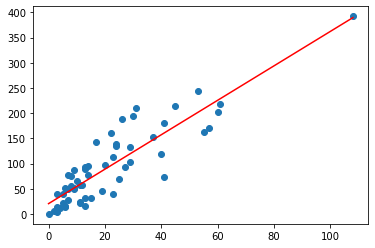

In [14]:

model = LinearRegression()
model.calculate_theta(x_train, y_train)
y_pred = model.predict_y(x_train)

plot_regression(x_train, y_train, y_pred)

If your implementation have worked, you should see in the plot a red line passing right on the middle of your data, that line is your regression model, which predict a *y* given an input *x*.


**2.2 Non-linear regression \[4\]**

---

In some cases your data may not have a linear relation, which means that linear regression may not correctly fit your data. In this second task you should deal with non-linear regression.

In [15]:
# Dataset read
df1 = pd.read_csv('non_linear.csv')
x1 = df1['X'].values
y1 = df1['Y'].values

If you run the same implementations from the last task, you should see that the regression model can not properly fit non-linear data.

In [16]:
x_train, y_train, x_val, y_val = split_data(x1, y1)

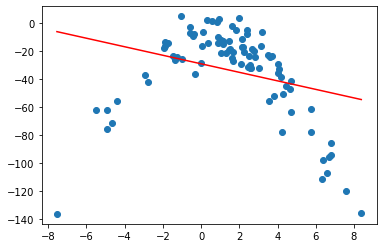

In [17]:
model = LinearRegression()
model.calculate_theta(x_train, y_train)
y_pred = model.predict_y(x_train)
plot_regression(x_train, y_train, y_pred)

For that, a non-linear regression should be implemented in order to fit non-linear data. In the next task you should implement the functions from the *NonLinearRegression* class to calculate the $\theta$ parameters (now it will be a vector of parameters) of the regression function $f(x) = \phi(x)^T\theta$ for non-linear data, where $\phi$ is a non-linear transformation, e.g. polynomial transformation. Your implementation should be able to build a model for *n-degree* polynoms, where the polynom degree will be passed as argument.

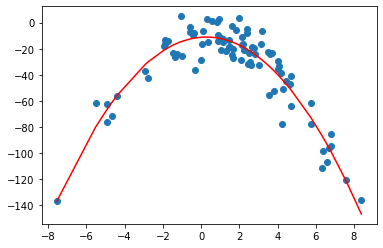

In [18]:
from regression import *

model = NonLinearRegression()
model.calculate_theta(x_train, y_train, degree=2)
y_pred = model.predict_y(x_train)

plot_regression(x_train, y_train, y_pred)

If you have implemented it correctly you should se a curved line passing over your data. The non-linear regression fits better our non-linear data since now our model is a polynom and not just a line anymore.

**2.3 Evaluating your model \[2\]**

---

With a non-linear regression model you can increase your polynom degree to improve even more your model. In this task you should implement the root mean square error (RMSE) metric and evaluate your model with different polynomial degrees (where $\overline{y}$ is the prediction from your model):


$ RMSE(y, \overline{y}) = \sqrt{\frac{1}{N}\sum_{n=1}^{N} (y_n - \overline{y_n})^2} $

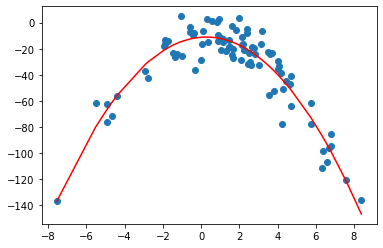

Degree: 2	RMSE train: 10.721847	RMSE val: 11.530788


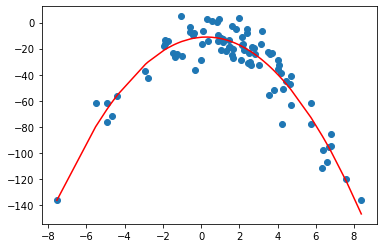

Degree: 3	RMSE train: 10.721620	RMSE val: 11.516043


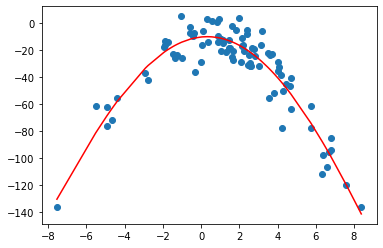

Degree: 4	RMSE train: 10.651760	RMSE val: 11.638332


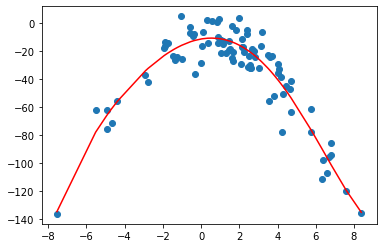

Degree: 5	RMSE train: 10.552926	RMSE val: 11.821213


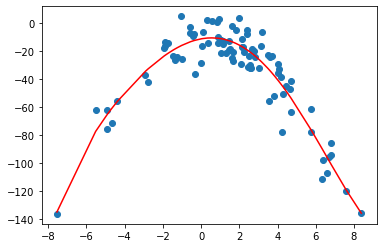

Degree: 6	RMSE train: 10.551268	RMSE val: 11.808867


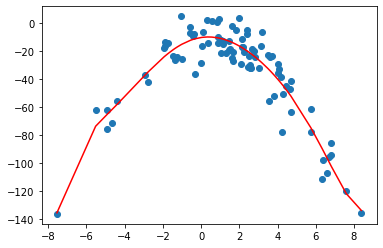

Degree: 7	RMSE train: 10.509303	RMSE val: 11.743982


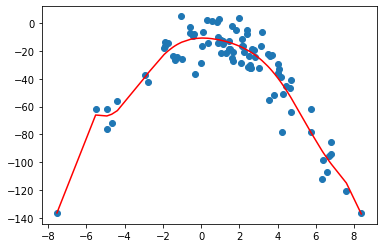

Degree: 8	RMSE train: 10.360383	RMSE val: 11.590170


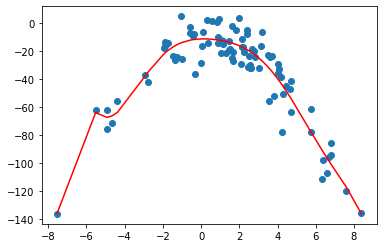

Degree: 9	RMSE train: 10.345967	RMSE val: 11.522638


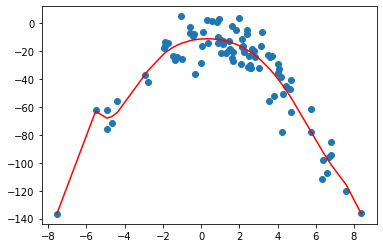

Degree: 10	RMSE train: 10.338811	RMSE val: 11.592149


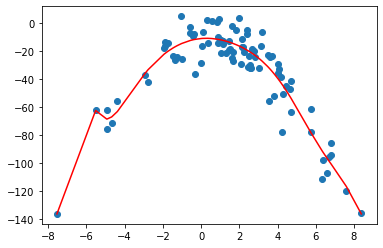

Degree: 11	RMSE train: 10.333608	RMSE val: 11.584657


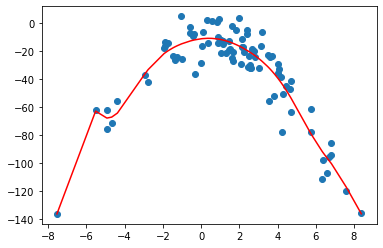

Degree: 12	RMSE train: 10.329138	RMSE val: 11.490945


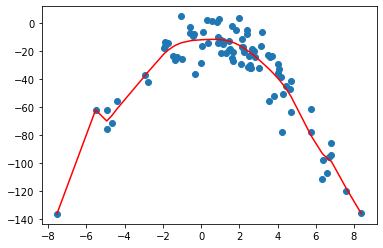

Degree: 13	RMSE train: 10.297336	RMSE val: 11.507332


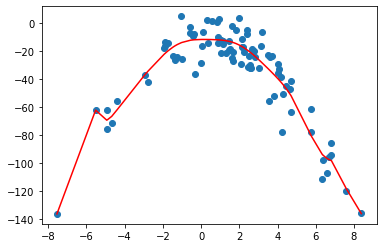

Degree: 14	RMSE train: 10.292443	RMSE val: 11.625831


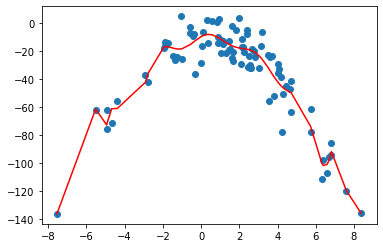

Degree: 15	RMSE train: 9.881782	RMSE val: 13.309465


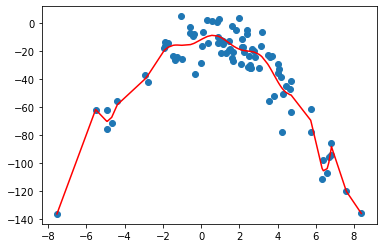

Degree: 16	RMSE train: 9.711084	RMSE val: 13.417629


In [19]:
from regression import *

##################################################################################
# call here your functions. You should:
# - calculate the function parameters theta (vector of thetas)
# - infer the y_val_pred values given x_val and the calculated theta with degree=d
# - calculate the RMSE for the model
##################################################################################

for d in range(2,17):
    model = NonLinearRegression()
    model.calculate_theta(x_train, y_train, degree=d)
    y_pred = model.predict_y(x_train)

    plot_regression(x_train, y_train, y_pred)
    y_val_pred = model.predict_y(x_val)
    # print root mean square error for train and validation sets
    train_rmse = rmse(y_train, y_pred)
    val_rmse = rmse(y_val, y_val_pred)
    print('Degree: %d\tRMSE train: %f\tRMSE val: %f' % (d, train_rmse, val_rmse))

From the plots above you can notice that, as the polynom degree increase, the train RMSE value decrease, however for the validation set the RMSE increases. Why does this happen?

- *Answer here*

As we built our design matrix over training data, the RMSE value is decreasing with increase in degree, it tries to fit the curve more and more with the data
In contrast our model has no idea about validation data, so as the degree increase the model fails to incorporate the validation values as we overfitted the model to training data